EXERCISE 2 : Naive Baiyes and K-Nearest Neighbor

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, auc)
print("All Necessary Libraries Imported.")

All Necessary Libraries Imported.


In [46]:
data = pd.read_csv("spambase_csv_Kaggle.csv")
print("Dataset Loaded.")
data.info()
print(data.describe())

print(data.isnull().sum())


Dataset Loaded.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report 

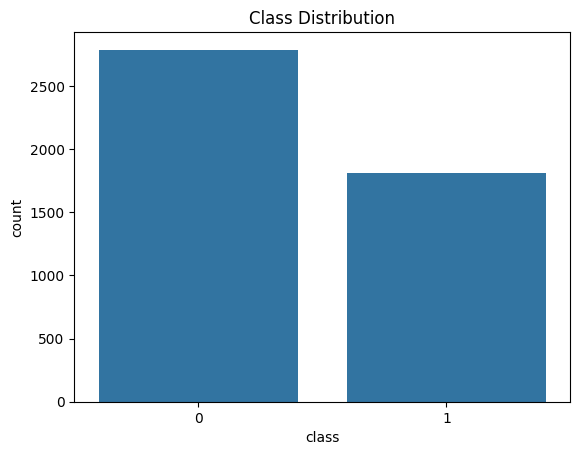

In [47]:
X = data.iloc[:, :-1]
y = data.iloc[: , -1]
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
def evaluate_model(y_true, y_pred, train_time, pred_time):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, fp = cm.ravel()

    return {
        "Accuracy" : accuracy_score(y_true,y_pred),
        "Precision" : precision_score(y_true,y_pred),
        "Recall" : recall_score(y_true,y_pred),
        "F1 Score" : f1_score(y_true,y_pred),
        "Specificity" : tn / (tn+fp),
        "False Positive Rate" : fp/(fp+tn),
        "Training Time(s)" : train_time,
        "Prediction Time(s)" : pred_time
    }

NAIVE BAYES

Gaussian NB
Accuracy : 0.8339
Precision : 0.7178
Recall : 0.9532
F1 Score : 0.8189
Specificity : 0.5495
False Positive Rate : 0.4505
Training Time(s) : 0.0042
Prediction Time(s) : 0.0013


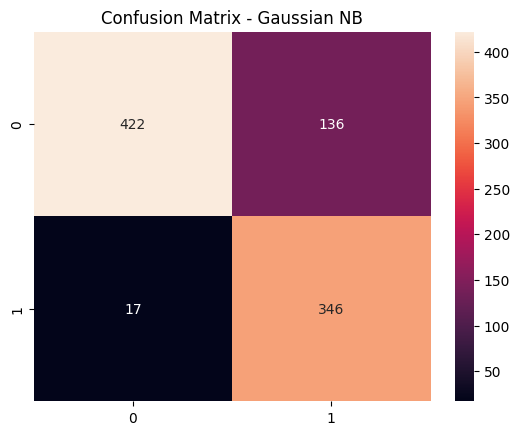


Multinomial NB
Accuracy : 0.7763
Precision : 0.7199
Recall : 0.7080
F1 Score : 0.7139
Specificity : 0.6406
False Positive Rate : 0.3594
Training Time(s) : 0.0027
Prediction Time(s) : 0.0010


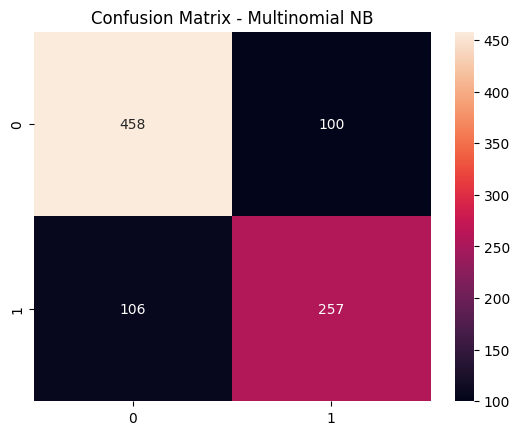


Bernoulli NB
Accuracy : 0.8762
Precision : 0.8716
Recall : 0.8044
F1 Score : 0.8367
Specificity : 0.6382
False Positive Rate : 0.3618
Training Time(s) : 0.0045
Prediction Time(s) : 0.0018


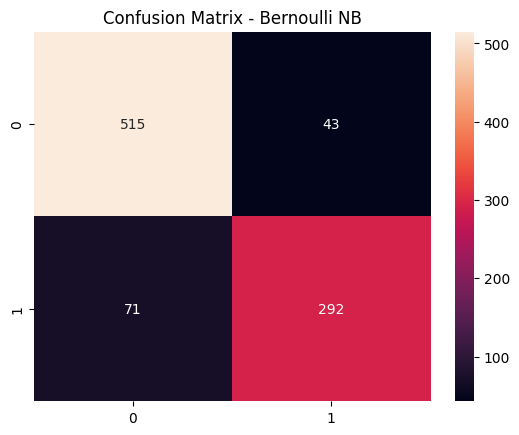

In [50]:
print("NAIVE BAYES")
nb_models = {
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB()
}

nb_results = {}

for name,model in nb_models.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    start = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start

    metrics = evaluate_model(y_test, y_pred, train_time, pred_time)
    nb_results[name] = metrics

    print(f"\n{name}")
    for k, v in metrics.items():
        print(f"{k} : {v:.4f}")

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

K-NearestNeighbor


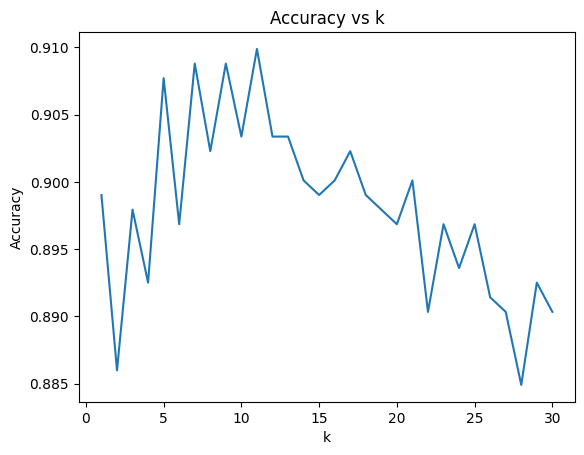

In [51]:
print("K-NearestNeighbor")
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

acc = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc.append(knn.score(X_test_scaled,y_test))

plt.plot(range(1,31), acc)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.show()

In [52]:
param_grid = {
    "n_neighbors": range(1, 31),
    "weights": ["uniform", "distance"],
    "algorithm": ["kd_tree", "ball_tree"]
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)

random = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)
random.fit(X_train_scaled, y_train)

print("Tuned KNN Results.")
print("Grid Search Best Params:", grid.best_params_)
print("Grid Search Best CV Accuracy:", grid.best_score_)

print("Random Search Best Params:", random.best_params_)
print("Random Search Best CV Accuracy:", random.best_score_)


Tuned KNN Results.
Grid Search Best Params: {'algorithm': 'kd_tree', 'n_neighbors': 15, 'weights': 'distance'}
Grid Search Best CV Accuracy: 0.9209239130434783
Random Search Best Params: {'weights': 'distance', 'n_neighbors': 15, 'algorithm': 'ball_tree'}
Random Search Best CV Accuracy: 0.9209239130434783


In [53]:
print("KDTree vs BallTree")

def run_knn(algorithm):
    knn = KNeighborsClassifier(
        n_neighbors=grid.best_params_["n_neighbors"],
        weights = grid.best_params_["weights"],
        algorithm=algorithm
    )

    start = time.time()
    knn.fit(X_train_scaled, y_train)
    train_time = time.time() - start

    start = time.time()
    y_pred = knn.predict(X_test_scaled)
    pred_time = time.time() - start

    return evaluate_model(y_test, y_pred, train_time, pred_time)

kd_metrics = run_knn("kd_tree")
ball_metrics = run_knn("ball_tree")

print("KD Tree Metrics")
for k,v in kd_metrics.items():
    print(f"{k}: {v:.4f}")
print("")
print("Ball Tree Metrics")
for k,v in ball_metrics.items():
    print(f"{k}: {v:.4f}")

KDTree vs BallTree
KD Tree Metrics
Accuracy: 0.9175
Precision: 0.9065
Recall: 0.8815
F1 Score: 0.8939
Specificity: 0.6213
False Positive Rate: 0.3787
Training Time(s): 0.0256
Prediction Time(s): 0.2356

Ball Tree Metrics
Accuracy: 0.9175
Precision: 0.9065
Recall: 0.8815
F1 Score: 0.8939
Specificity: 0.6213
False Positive Rate: 0.3787
Training Time(s): 0.0075
Prediction Time(s): 0.1619


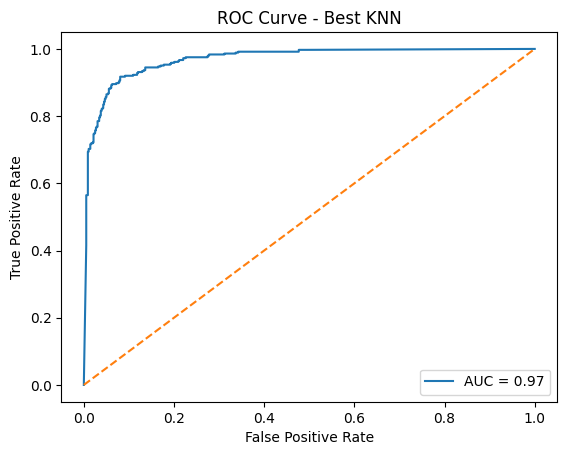

Exception ignored in: <function ResourceTracker.__del__ at 0x7f380b62e5c0>
Traceback (most recent call last):
  File "/home/ssn-29/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/ssn-29/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/ssn-29/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7f1e3d1825c0>
Traceback (most recent call last):
  File "/home/ssn-29/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/ssn-29/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/ssn-29/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__

In [54]:
best_knn = grid.best_estimator_
y_prob = best_knn.predict_proba(X_test_scaled)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Best KNN")
plt.legend()
plt.show()